# Problem Statement

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. You will need to submit a Jupyter notebook for the same. 

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Step 1: Reading and Understanding the Data

In [318]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [319]:
import warnings
warnings.filterwarnings('ignore')

In [320]:
bikes_m=pd.read_csv('day.csv')

In [321]:
bikes_m.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### We can Remove instant from this data

In [322]:
bikes_m=bikes_m.drop('instant',axis=1)

In [323]:
bikes_m

dteday  season  yr  mnth  holiday  weekday  workingday  weathersit  \
0    01-01-2018       1   0     1        0        1           1           2   
1    02-01-2018       1   0     1        0        2           1           2   
2    03-01-2018       1   0     1        0        3           1           1   
3    04-01-2018       1   0     1        0        4           1           1   
4    05-01-2018       1   0     1        0        5           1           1   
..          ...     ...  ..   ...      ...      ...         ...         ...   
725  27-12-2019       1   1    12        0        5           1           2   
726  28-12-2019       1   1    12        0        6           0           2   
727  29-12-2019       1   1    12        0        0           0           2   
728  30-12-2019       1   1    12        0        1           1           1   
729  31-12-2019       1   1    12        0        2           1           2   

          temp     atemp      hum  windspeed  casual  registered   cnt  
0    14.110847  18.18125  80.5833  10.749882     331         654   985  
1    14.902598  17.68695  69.6087  16.652113     131         670   801  
2     8.050924   9.47025  43.7273  16.636703     120        1229  1349  
3     8.200000  10.60610  59.0435  10.739832     108        1454  1562  
4     9.305237  11.46350  43.6957  12.522300      82        1518  1600  
..         ...       ...      ...        ...     ...         ...   ...  
725  10.420847  11.33210  65.2917  23.458911     247        1867  2114  
726  10.386653  12.75230  59.0000  10.416557     644        2451  3095  
727  10.386653  12.12000  75.2917   8.333661     159        1182  1341  
728  10.489153  11.58500  48.3333  23.500518     364        1432  1796  
729   8.849153  11.17435  57.7500  10.374682     439        2290  2729  

[730 rows x 15 columns]

In [324]:
bikes_m.isna().sum()/bikes_m.shape[0]

dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

Here no null values are present 

### Here we can remove date as the corresponding values are already present in the data

In [325]:
bikes_m=bikes_m.drop('dteday',axis=1)

In [326]:
bikes_m.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        1           1           2  14.110847   
1       1   0     1        0        2           1           2  14.902598   
2       1   0     1        0        3           1           1   8.050924   
3       1   0     1        0        4           1           1   8.200000   
4       1   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [327]:
bikes_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [328]:
bikes_m.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.995890    0.690411   
std      1.110184    0.500343    3.450215    0.167266    2.000339    0.462641   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.544807    7.506729    8.150308   14.237589    5.195841   
min      1.000000    2.424346    3.953480    0.000000    1.500244   
25%      1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000   20.465826   24.368225   62.625000   12.125325   
75%      2.000000   26.880615   30.445775   72.989575   15.625589   
max      3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Visualising the Data

Here some Category fields are numeric so we can convert

In [329]:
def seasons(x):
     return x.map({'1':'spring',
           '2':'summer',
          '3':'fall',
          '4':'winter'})

value=['season']
bikes_m['season']=bikes_m[value].astype('str').apply(seasons)
bikes_m.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1           2  14.110847   
1  spring   0     1        0        2           1           2  14.902598   
2  spring   0     1        0        3           1           1   8.050924   
3  spring   0     1        0        4           1           1   8.200000   
4  spring   0     1        0        5           1           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [330]:
def weathersits(x):
     return x.map({'1':'clear',
           '2':'mist cloud',
          '3':'light rain or snow',
          '4':'Heavy rain or snow'})

value=['weathersit']
bikes_m['weathersit']=bikes_m[value].astype('str').apply(weathersits)
bikes_m.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0     1        0        1           1  mist cloud  14.110847   
1  spring   0     1        0        2           1  mist cloud  14.902598   
2  spring   0     1        0        3           1       clear   8.050924   
3  spring   0     1        0        4           1       clear   8.200000   
4  spring   0     1        0        5           1       clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

In [331]:
def months(x):
     return x.map({'1':'Jan',
           '2':'Feb','3':'Mar','4':'Apr',
           '5':'May','6':'Jun','7':'Jul',
           '8':'Aug','9':'Sep','10':'Oct',
            '11':'Nov','12':'Dec'})

value=['mnth']
bikes_m['mnth']=bikes_m[value].astype('str').apply(months)
bikes_m.head(8)

season  yr mnth  holiday  weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0        1           1  mist cloud  14.110847   
1  spring   0  Jan        0        2           1  mist cloud  14.902598   
2  spring   0  Jan        0        3           1       clear   8.050924   
3  spring   0  Jan        0        4           1       clear   8.200000   
4  spring   0  Jan        0        5           1       clear   9.305237   
5  spring   0  Jan        0        6           0       clear   8.378268   
6  spring   0  Jan        0        0           0  mist cloud   8.057402   
7  spring   0  Jan        0        1           1  mist cloud   6.765000   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600  
5  11.66045  51.8261   6.000868      88        1518  1606  
6  10.44195  49.8696  11.304642     148        1362  1510  
7   8.11270  53.5833  17.875868      68         891   959

In [332]:
def days(x):
     return x.map({'1':'Mon',
           '2':'Tue','3':'Wed','4':'Thur',
           '5':'Fri','6':'Sat','0':'Sun'})

value=['weekday']
bikes_m['weekday']=bikes_m[value].astype('str').apply(days)
bikes_m.head()

season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0     Mon           1  mist cloud  14.110847   
1  spring   0  Jan        0     Tue           1  mist cloud  14.902598   
2  spring   0  Jan        0     Wed           1       clear   8.050924   
3  spring   0  Jan        0    Thur           1       clear   8.200000   
4  spring   0  Jan        0     Fri           1       clear   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  
0  18.18125  80.5833  10.749882     331         654   985  
1  17.68695  69.6087  16.652113     131         670   801  
2   9.47025  43.7273  16.636703     120        1229  1349  
3  10.60610  59.0435  10.739832     108        1454  1562  
4  11.46350  43.6957  12.522300      82        1518  1600

Here we need only cnt so we can safely remove casual and registered

### EDA

In [333]:
Category=bikes_m.select_dtypes('object').columns.to_list()

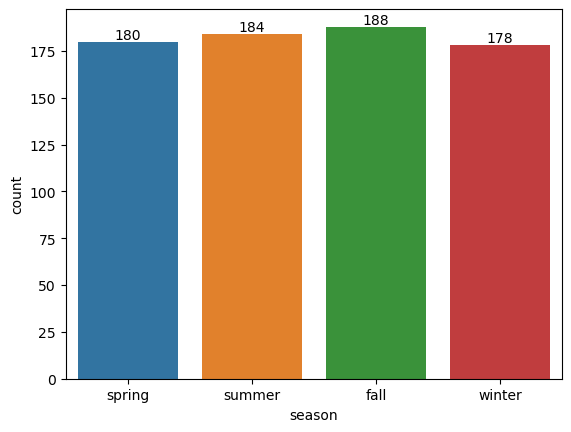

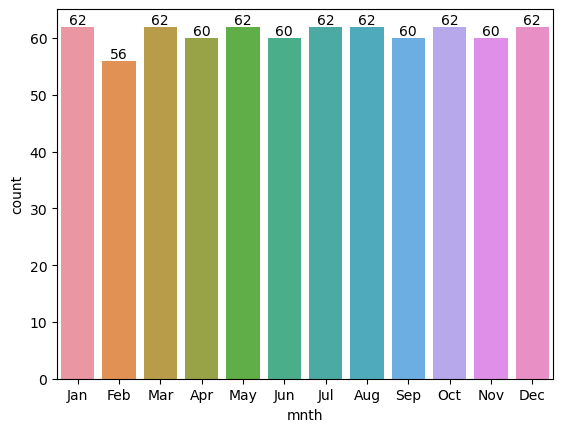

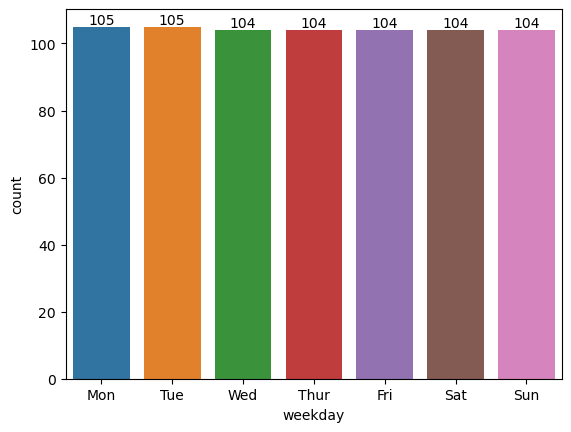

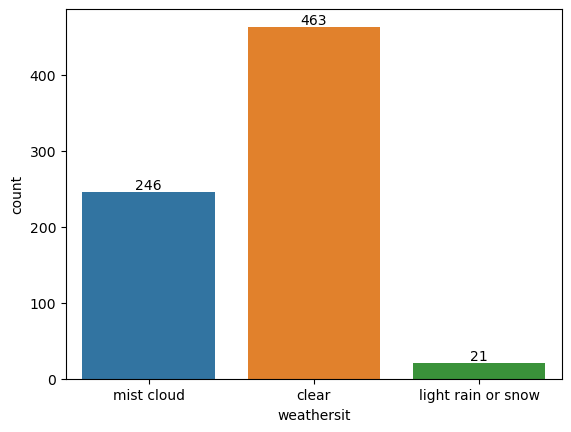

In [334]:
for i in Category:
    ax=sns.countplot(data=bikes_m,x=i)
    ax.bar_label(ax.containers[0])
    plt.show()

In [335]:
bikes_m.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [336]:
numeric=['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']

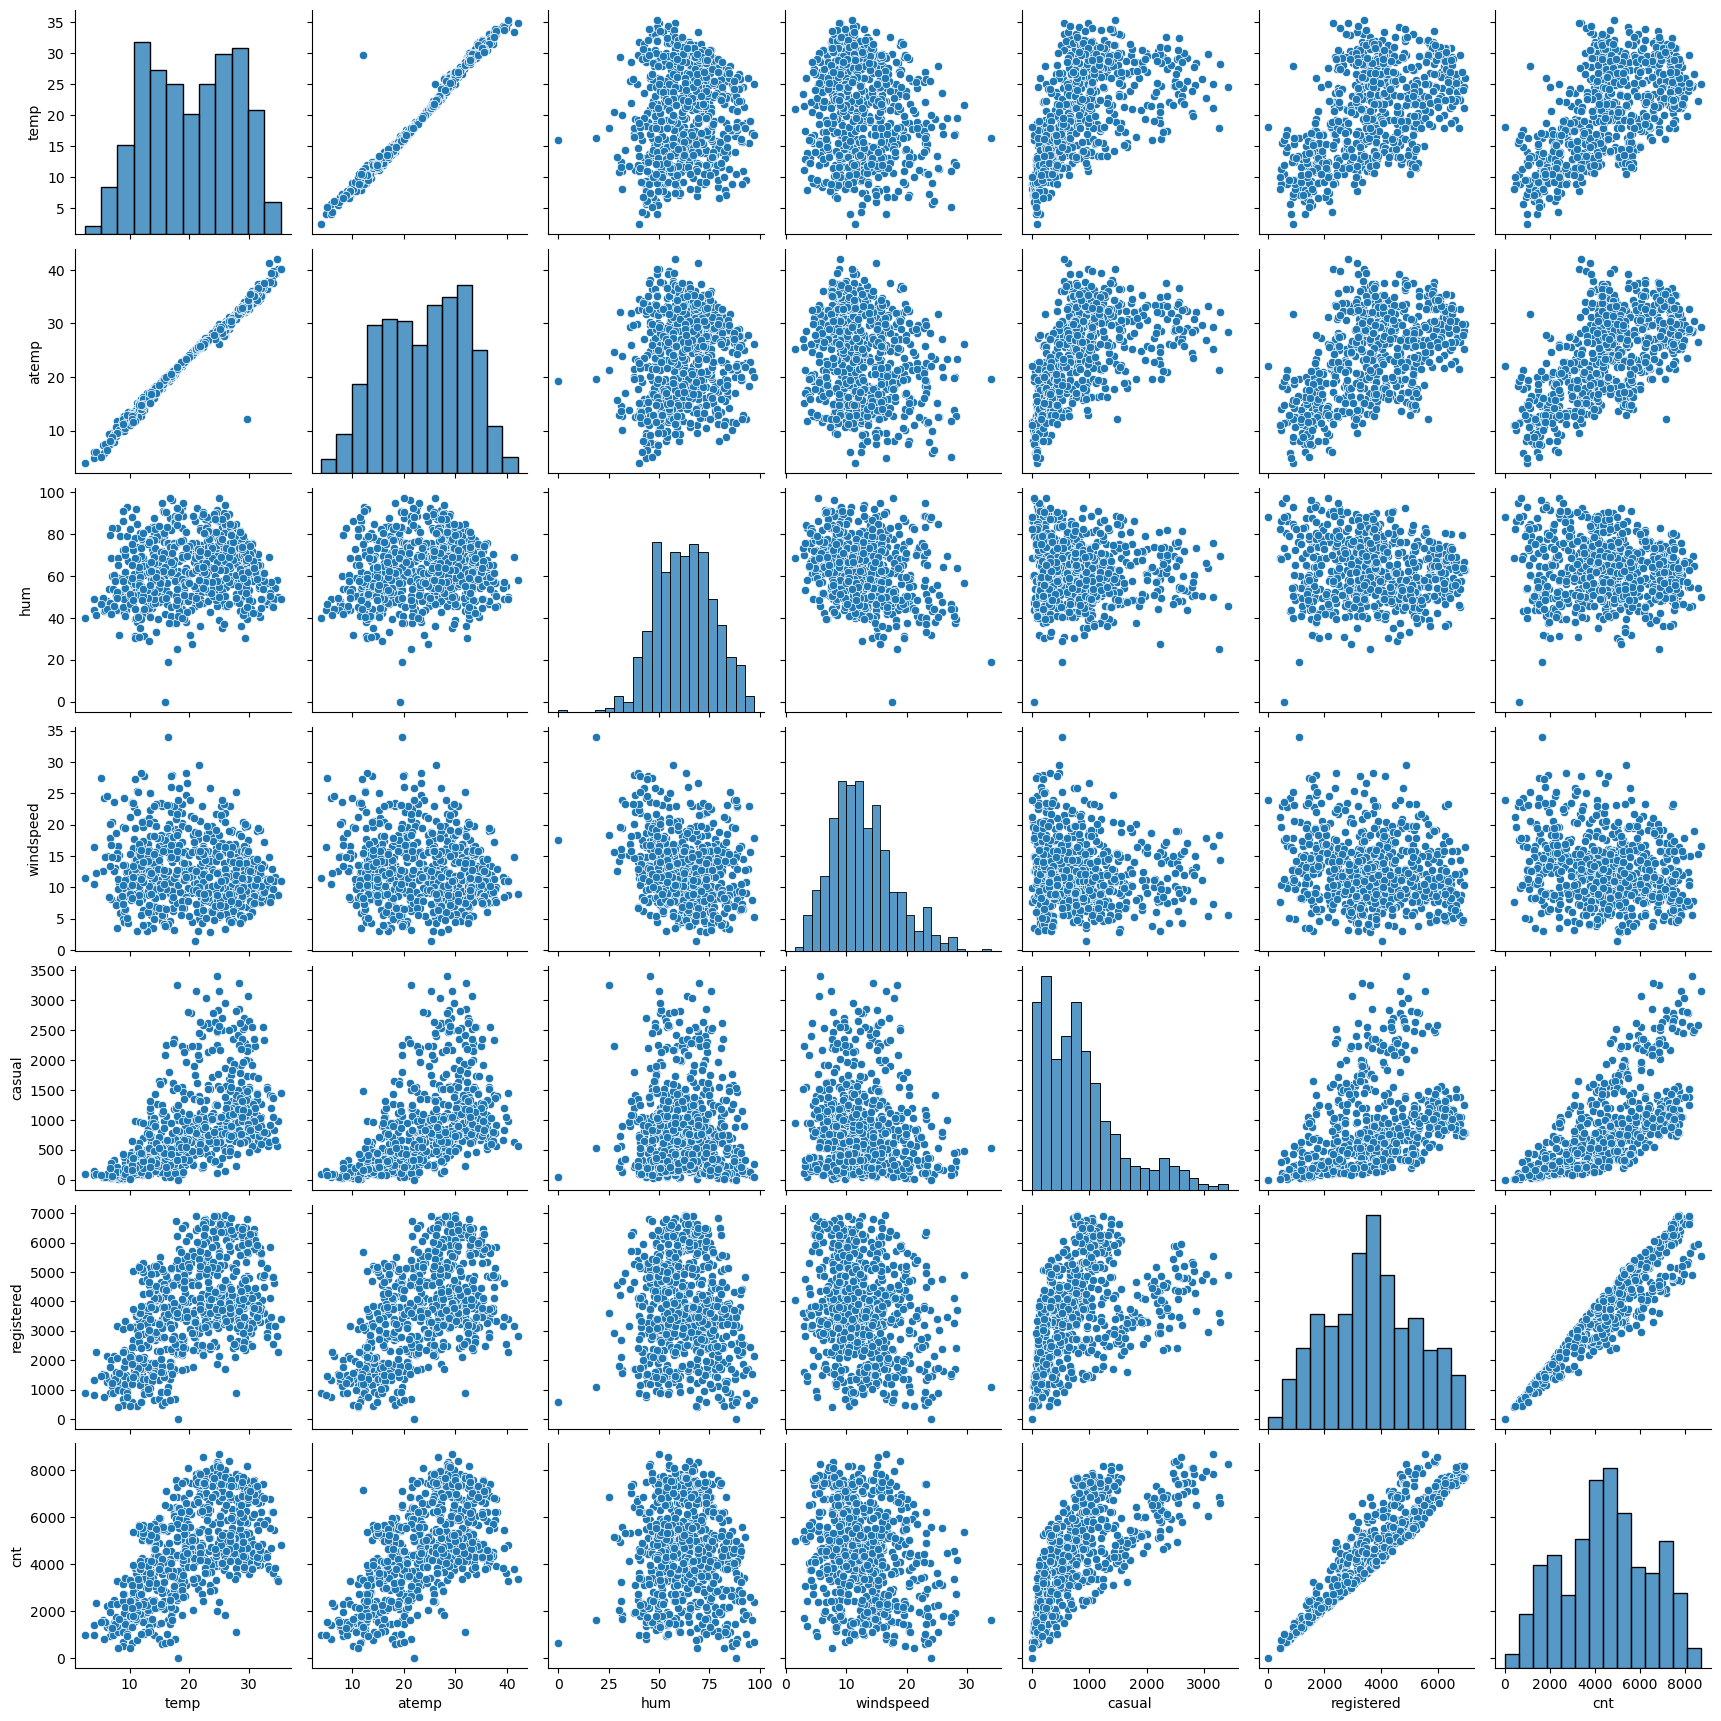

In [337]:
sns.pairplot(bikes_m[numeric])

From above we can remove causal,registered as these are correlating with other values

In [338]:
bikes_m=bikes_m.drop(['casual','registered'],axis=1)

In [339]:
bikes_m

season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0    spring   0  Jan        0     Mon           1  mist cloud  14.110847   
1    spring   0  Jan        0     Tue           1  mist cloud  14.902598   
2    spring   0  Jan        0     Wed           1       clear   8.050924   
3    spring   0  Jan        0    Thur           1       clear   8.200000   
4    spring   0  Jan        0     Fri           1       clear   9.305237   
..      ...  ..  ...      ...     ...         ...         ...        ...   
725  spring   1  Dec        0     Fri           1  mist cloud  10.420847   
726  spring   1  Dec        0     Sat           0  mist cloud  10.386653   
727  spring   1  Dec        0     Sun           0  mist cloud  10.386653   
728  spring   1  Dec        0     Mon           1       clear  10.489153   
729  spring   1  Dec        0     Tue           1  mist cloud   8.849153   

        atemp      hum  windspeed   cnt  
0    18.18125  80.5833  10.749882   985  
1    17.68695  69.6087  16.652113   801  
2     9.47025  43.7273  16.636703  1349  
3    10.60610  59.0435  10.739832  1562  
4    11.46350  43.6957  12.522300  1600  
..        ...      ...        ...   ...  
725  11.33210  65.2917  23.458911  2114  
726  12.75230  59.0000  10.416557  3095  
727  12.12000  75.2917   8.333661  1341  
728  11.58500  48.3333  23.500518  1796  
729  11.17435  57.7500  10.374682  2729  

[730 rows x 12 columns]

In [340]:
numeric=['temp', 'atemp', 'hum', 'windspeed','cnt']

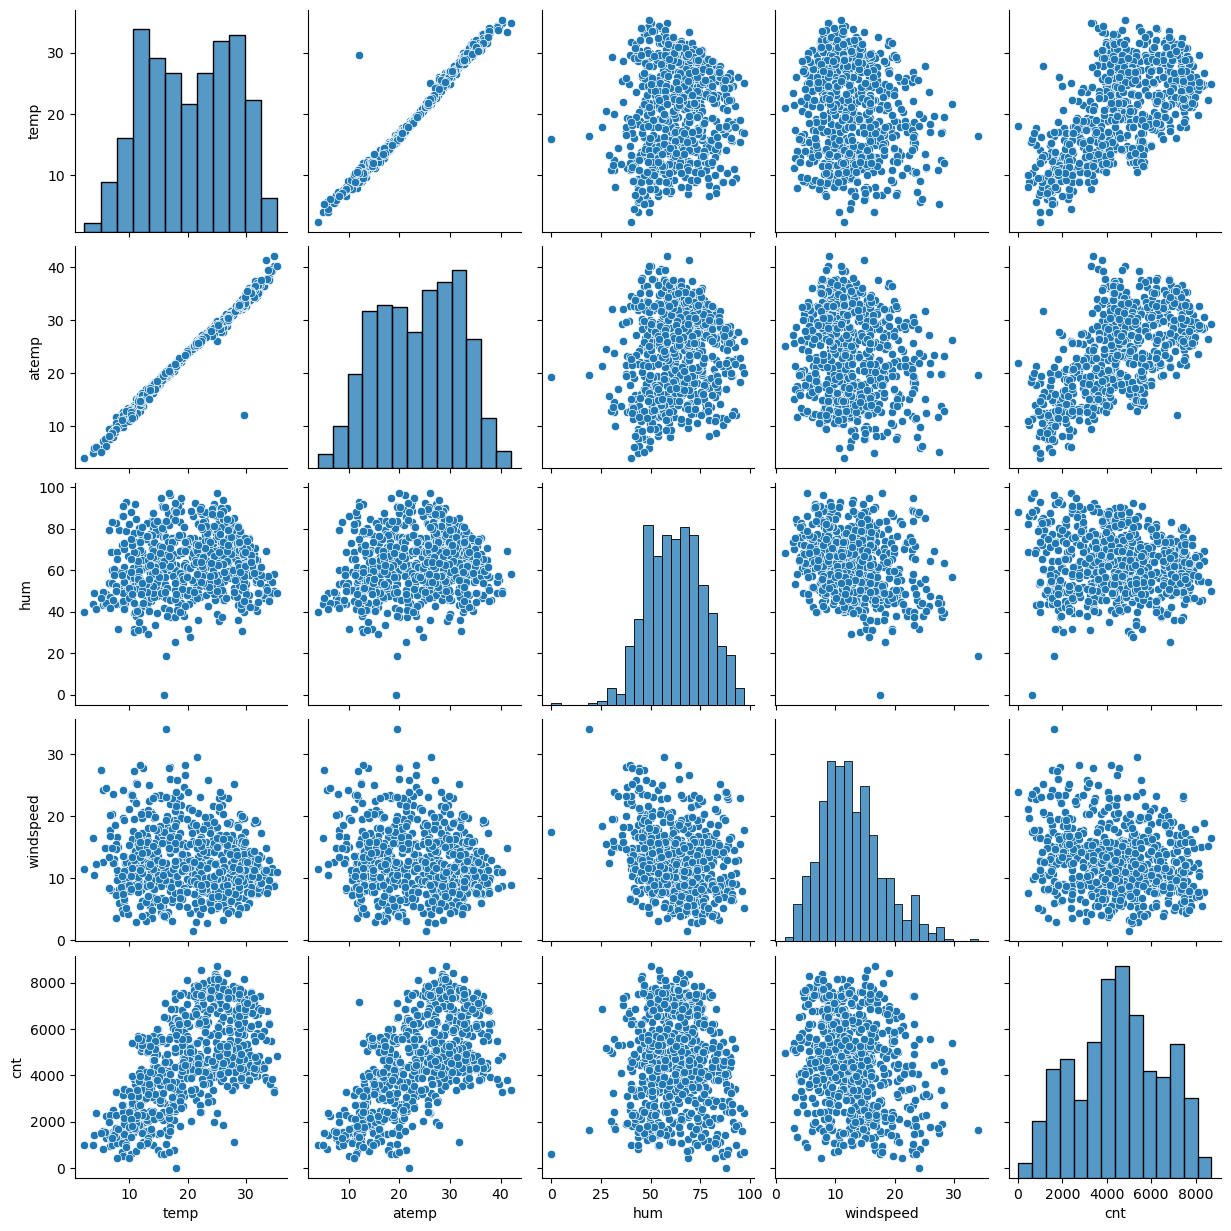

In [341]:
sns.pairplot(bikes_m[numeric])

<AxesSubplot:>

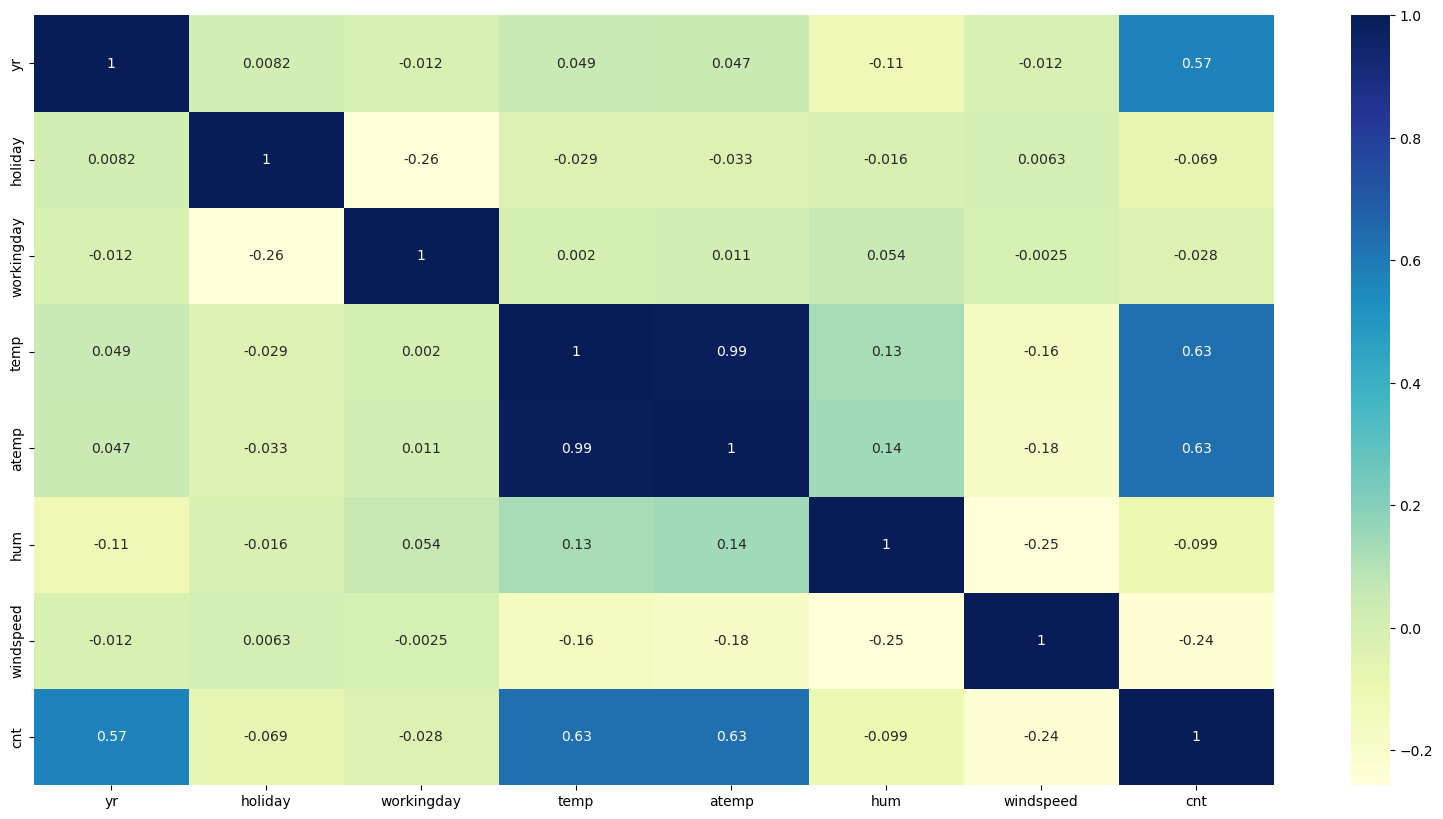

In [342]:
plt.figure(figsize=(20,10))
sns.heatmap(bikes_m.corr(),annot=True,cmap='YlGnBu')

Here collinearilty exists between emp,atemp

In [343]:
bikes_m=bikes_m.drop(['atemp'],axis=1)

In [344]:
bikes_m.head()

season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0     Mon           1  mist cloud  14.110847   
1  spring   0  Jan        0     Tue           1  mist cloud  14.902598   
2  spring   0  Jan        0     Wed           1       clear   8.050924   
3  spring   0  Jan        0    Thur           1       clear   8.200000   
4  spring   0  Jan        0     Fri           1       clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

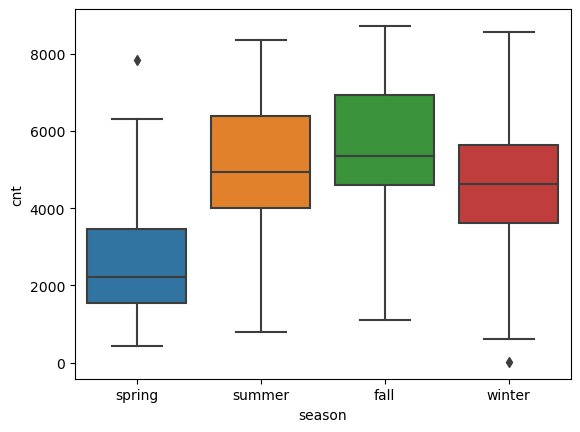

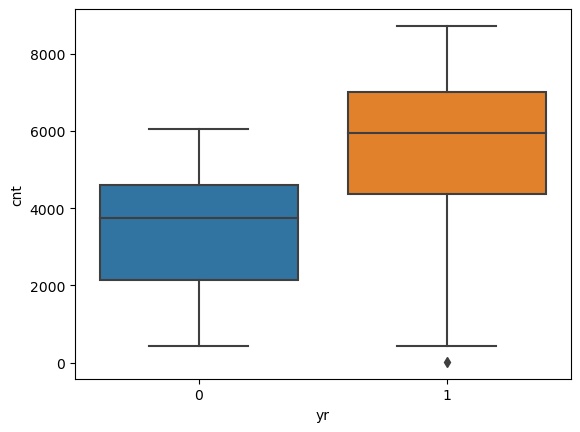

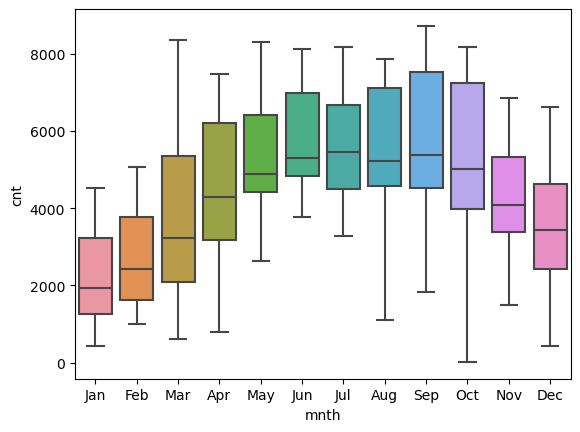

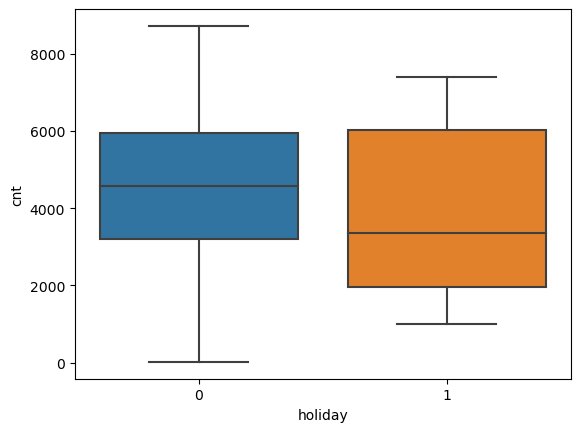

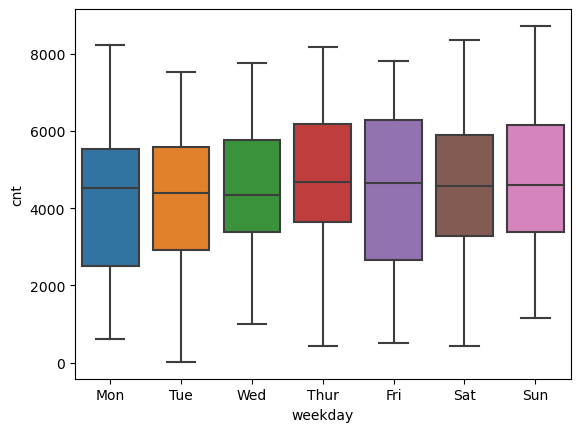

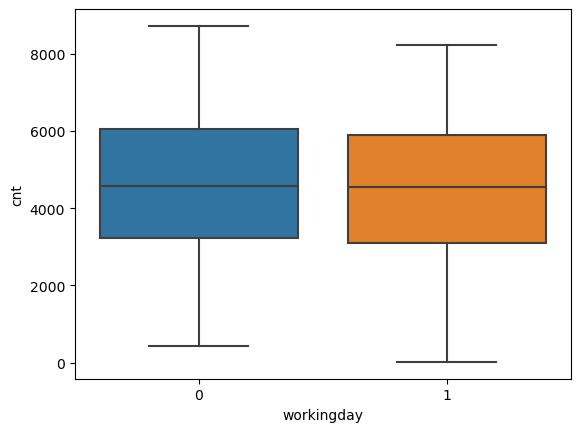

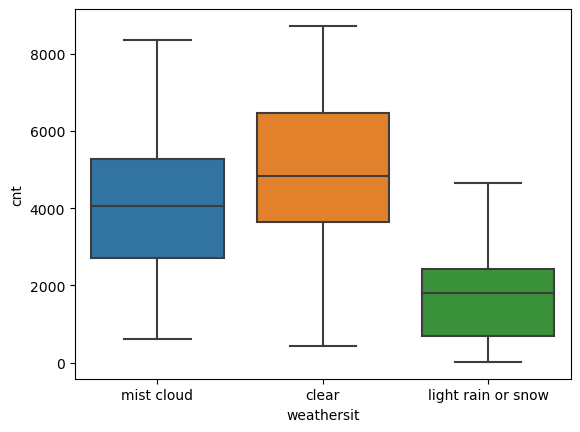

In [345]:
values=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit']
for i in values:
    sns.boxplot(x=bikes_m[i],y=bikes_m['cnt'])
    plt.show()

From here we can infer:

1.	By doing Box plot using count we have fall season followed by summer has more count, spring has low values of count which says fall is the best season to increase our sales.
2.	As from the year, the year increase affects the increase in count this shows the company has been growing in popularity.
3.	When months are taken , the count gets increase until October and from there it gets downfall at the end of year as these are holiday seasons,  and  September has highest count than while the medians are almost equal there interquartile range varies for Sep, Oct, Aug.
4.	The median for not holiday is more than that of holiday and 75 % quartile is same during the holiday and not holiday this shows people prefer to stay indoor and enjoy there free time.
5.	Friday has more quartile range compared to other days and count is increasing and median is same for Thursday, Friday and Saturday.
6.	Working day has no affect on the count as people shows people are preferring them not based on working days
7.	Clear weathers show a good count which says on a clear weather day we can expect good count


## Step 3: Data Preparation

In [346]:
values=['season','mnth','weekday','weathersit']

In [347]:
dummy=pd.get_dummies(bikes_m['season'],drop_first=True)
bikes_m=pd.concat((bikes_m,dummy),axis=1)

In [348]:
dummy=pd.get_dummies(bikes_m['mnth'],drop_first=True)
bikes_m=pd.concat((bikes_m,dummy),axis=1)

In [349]:
dummy=pd.get_dummies(bikes_m['weekday'],drop_first=True)
bikes_m=pd.concat((bikes_m,dummy),axis=1)

In [350]:
dummy=pd.get_dummies(bikes_m['weathersit'],drop_first=True)
bikes_m=pd.concat((bikes_m,dummy),axis=1)

In [351]:
bikes_m.head()

season  yr mnth  holiday weekday  workingday  weathersit       temp  \
0  spring   0  Jan        0     Mon           1  mist cloud  14.110847   
1  spring   0  Jan        0     Tue           1  mist cloud  14.902598   
2  spring   0  Jan        0     Wed           1       clear   8.050924   
3  spring   0  Jan        0    Thur           1       clear   8.200000   
4  spring   0  Jan        0     Fri           1       clear   9.305237   

       hum  windspeed  ...  Oct  Sep  Mon  Sat  Sun  Thur  Tue  Wed  \
0  80.5833  10.749882  ...    0    0    1    0    0     0    0    0   
1  69.6087  16.652113  ...    0    0    0    0    0     0    1    0   
2  43.7273  16.636703  ...    0    0    0    0    0     0    0    1   
3  59.0435  10.739832  ...    0    0    0    0    0     1    0    0   
4  43.6957  12.522300  ...    0    0    0    0    0     0    0    0   

   light rain or snow  mist cloud  
0                   0           1  
1                   0           1  
2                   0           0  
3                   0           0  
4                   0           0  

[5 rows x 33 columns]

In [352]:
bikes_m=bikes_m.drop(values,axis=1)

In [353]:
bikes_m.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
0   0        0           1  14.110847  80.5833  10.749882   985       1   
1   0        0           1  14.902598  69.6087  16.652113   801       1   
2   0        0           1   8.050924  43.7273  16.636703  1349       1   
3   0        0           1   8.200000  59.0435  10.739832  1562       1   
4   0        0           1   9.305237  43.6957  12.522300  1600       1   

   summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thur  Tue  Wed  \
0       0       0  ...    0    0    1    0    0     0    0    0   
1       0       0  ...    0    0    0    0    0     0    1    0   
2       0       0  ...    0    0    0    0    0     0    0    1   
3       0       0  ...    0    0    0    0    0     1    0    0   
4       0       0  ...    0    0    0    0    0     0    0    0   

   light rain or snow  mist cloud  
0                   0           1  
1                   0           1  
2                   0           0  
3                   0           0  
4                   0           0  

[5 rows x 29 columns]

In [354]:
bikes_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   hum                 730 non-null    float64
 5   windspeed           730 non-null    float64
 6   cnt                 730 non-null    int64  
 7   spring              730 non-null    uint8  
 8   summer              730 non-null    uint8  
 9   winter              730 non-null    uint8  
 10  Aug                 730 non-null    uint8  
 11  Dec                 730 non-null    uint8  
 12  Feb                 730 non-null    uint8  
 13  Jan                 730 non-null    uint8  
 14  Jul                 730 non-null    uint8  
 15  Jun                 730 non-null    uint8  
 16  Mar     

## Step 4: Splitting the Data into Training and Testing Sets

In [355]:
from sklearn.model_selection import train_test_split

In [356]:
from sklearn.preprocessing import MinMaxScaler

In [357]:
train,test=train_test_split(bikes_m,train_size=0.7,test_size=0.3,random_state=42)

In [358]:
train.head()

yr  holiday  workingday       temp      hum  windspeed   cnt  spring  \
683   1        0           1  13.188347  62.0417  10.250129  5445       0   
645   1        1           0  15.716653  70.9583  12.708493  5478       0   
163   0        0           1  26.035000  49.4583  20.458450  5020       0   
360   0        0           1  13.325000  76.2500  12.626150  1162       1   
640   1        0           1  26.957500  79.3750   4.458569  7572       0   

     summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thur  Tue  Wed  \
683       0       1  ...    0    0    0    0    0     0    0    0   
645       0       1  ...    1    0    0    0    0     0    1    0   
163       1       0  ...    0    0    0    0    0     0    0    1   
360       0       0  ...    0    0    0    0    0     1    0    0   
640       0       1  ...    1    0    0    0    0     1    0    0   

     light rain or snow  mist cloud  
683                   0           1  
645                   0           1  
163                   0           0  
360                   0           1  
640                   0           1  

[5 rows x 29 columns]

In [359]:
scale=MinMaxScaler()

In [360]:
values=['temp','hum','windspeed','cnt']

In [361]:
train[values]=scale.fit_transform(train[values])

In [362]:
train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
683   1        0           1  0.327133  0.639330   0.327101  0.605336       0   
645   1        1           0  0.403972  0.731215   0.419004  0.609320       0   
163   0        0           1  0.717562  0.509660   0.708724  0.554026       0   
360   0        0           1  0.331287  0.785745   0.415925  0.088253       1   
640   1        0           1  0.745598  0.817947   0.110593  0.862127       0   

     summer  winter  ...  Oct  Sep  Mon  Sat  Sun  Thur  Tue  Wed  \
683       0       1  ...    0    0    0    0    0     0    0    0   
645       0       1  ...    1    0    0    0    0     0    1    0   
163       1       0  ...    0    0    0    0    0     0    0    1   
360       0       0  ...    0    0    0    0    0     1    0    0   
640       0       1  ...    1    0    0    0    0     1    0    0   

     light rain or snow  mist cloud  
683                   0           1  
645                   0           1  
163                   0           0  
360                   0           1  
640                   0           1  

[5 rows x 29 columns]

In [363]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 683 to 435
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  510 non-null    int64  
 1   holiday             510 non-null    int64  
 2   workingday          510 non-null    int64  
 3   temp                510 non-null    float64
 4   hum                 510 non-null    float64
 5   windspeed           510 non-null    float64
 6   cnt                 510 non-null    float64
 7   spring              510 non-null    uint8  
 8   summer              510 non-null    uint8  
 9   winter              510 non-null    uint8  
 10  Aug                 510 non-null    uint8  
 11  Dec                 510 non-null    uint8  
 12  Feb                 510 non-null    uint8  
 13  Jan                 510 non-null    uint8  
 14  Jul                 510 non-null    uint8  
 15  Jun                 510 non-null    uint8  
 16  Mar   

In [364]:
train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.521569    0.027451    0.698039    0.551091    0.653801    0.414566   
std      0.500025    0.163554    0.459559    0.227401    0.143542    0.185671   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.354176    0.544033    0.281934   
50%      1.000000    0.000000    1.000000    0.575824    0.659296    0.383964   
75%      1.000000    0.000000    1.000000    0.745338    0.756762    0.525698   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer      winter  ...         Oct  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.498206    0.231373    0.256863    0.250980  ...    0.090196   
std      0.233905    0.422124    0.437332    0.434003  ...    0.286744   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.345950    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.502233    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.677080    0.000000    1.000000    0.750000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sep         Mon         Sat         Sun        Thur         Tue  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.090196    0.149020    0.143137    0.133333    0.135294    0.156863   
std      0.286744    0.356457    0.350557    0.340268    0.342373    0.364028   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Wed  light rain or snow  mist cloud  
count  510.000000          510.000000  510.000000  
mean     0.133333            0.029412    0.345098  
std      0.340268            0.169124    0.475867  
min      0.000000            0.000000    0.000000  
25%      0.000000            0.000000    0.000000  
50%      0.000000            0.000000    0.000000  
75%      0.000000            0.000000    1.000000  
max      1.000000            1.000000    1.000000  

[8 rows x 29 columns]

<AxesSubplot:>

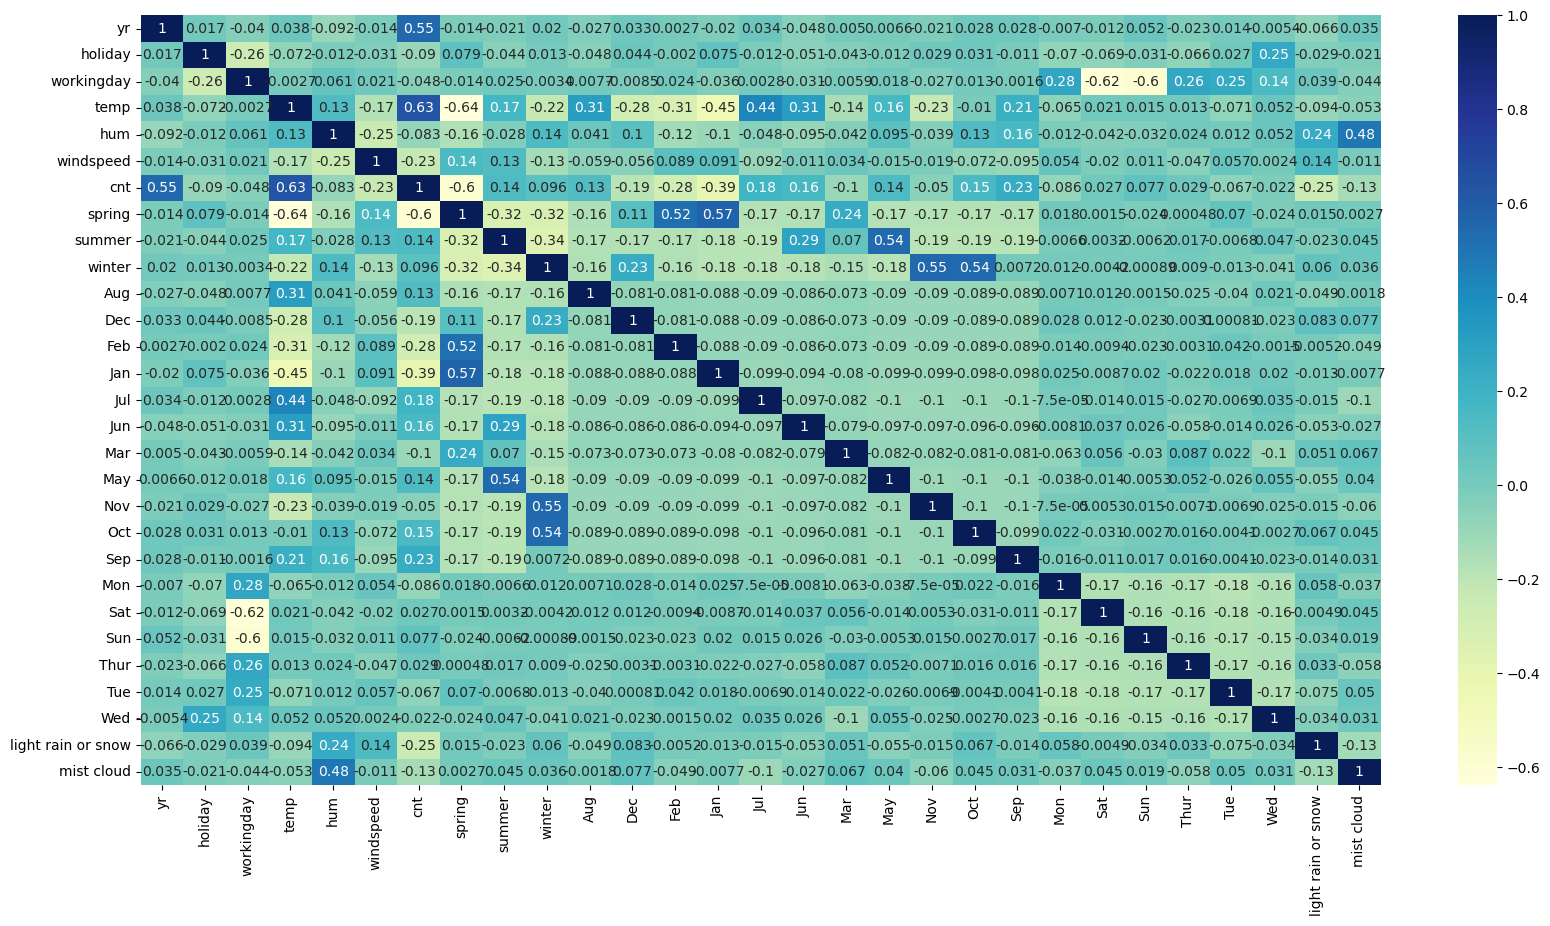

In [365]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),annot=True,cmap='YlGnBu')

#### Here we can see yr and temp are correlated 

<AxesSubplot:xlabel='temp', ylabel='cnt'>

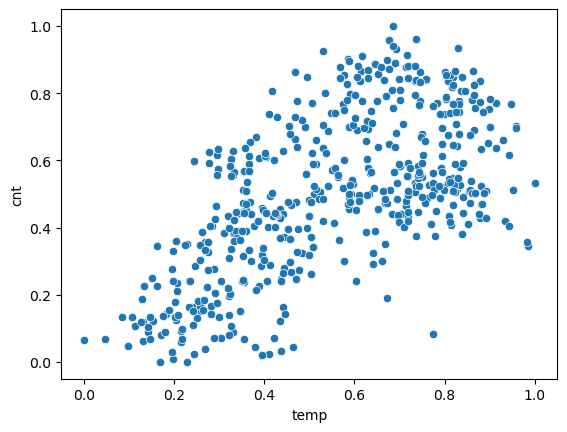

In [366]:
sns.scatterplot(data=train,x='temp',y='cnt')

### Dividing into X and Y sets for the model building

In [367]:
X_train=train.drop('cnt',axis=1)

In [368]:
y_train=train['cnt']

In [369]:
X_train.head()

yr  holiday  workingday      temp       hum  windspeed  spring  summer  \
683   1        0           1  0.327133  0.639330   0.327101       0       0   
645   1        1           0  0.403972  0.731215   0.419004       0       0   
163   0        0           1  0.717562  0.509660   0.708724       0       1   
360   0        0           1  0.331287  0.785745   0.415925       1       0   
640   1        0           1  0.745598  0.817947   0.110593       0       0   

     winter  Aug  ...  Oct  Sep  Mon  Sat  Sun  Thur  Tue  Wed  \
683       1    0  ...    0    0    0    0    0     0    0    0   
645       1    0  ...    1    0    0    0    0     0    1    0   
163       0    0  ...    0    0    0    0    0     0    0    1   
360       0    0  ...    0    0    0    0    0     1    0    0   
640       1    0  ...    1    0    0    0    0     1    0    0   

     light rain or snow  mist cloud  
683                   0           1  
645                   0           1  
163                   0           0  
360                   0           1  
640                   0           1  

[5 rows x 28 columns]

In [370]:
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: cnt, dtype: float64

<AxesSubplot:>

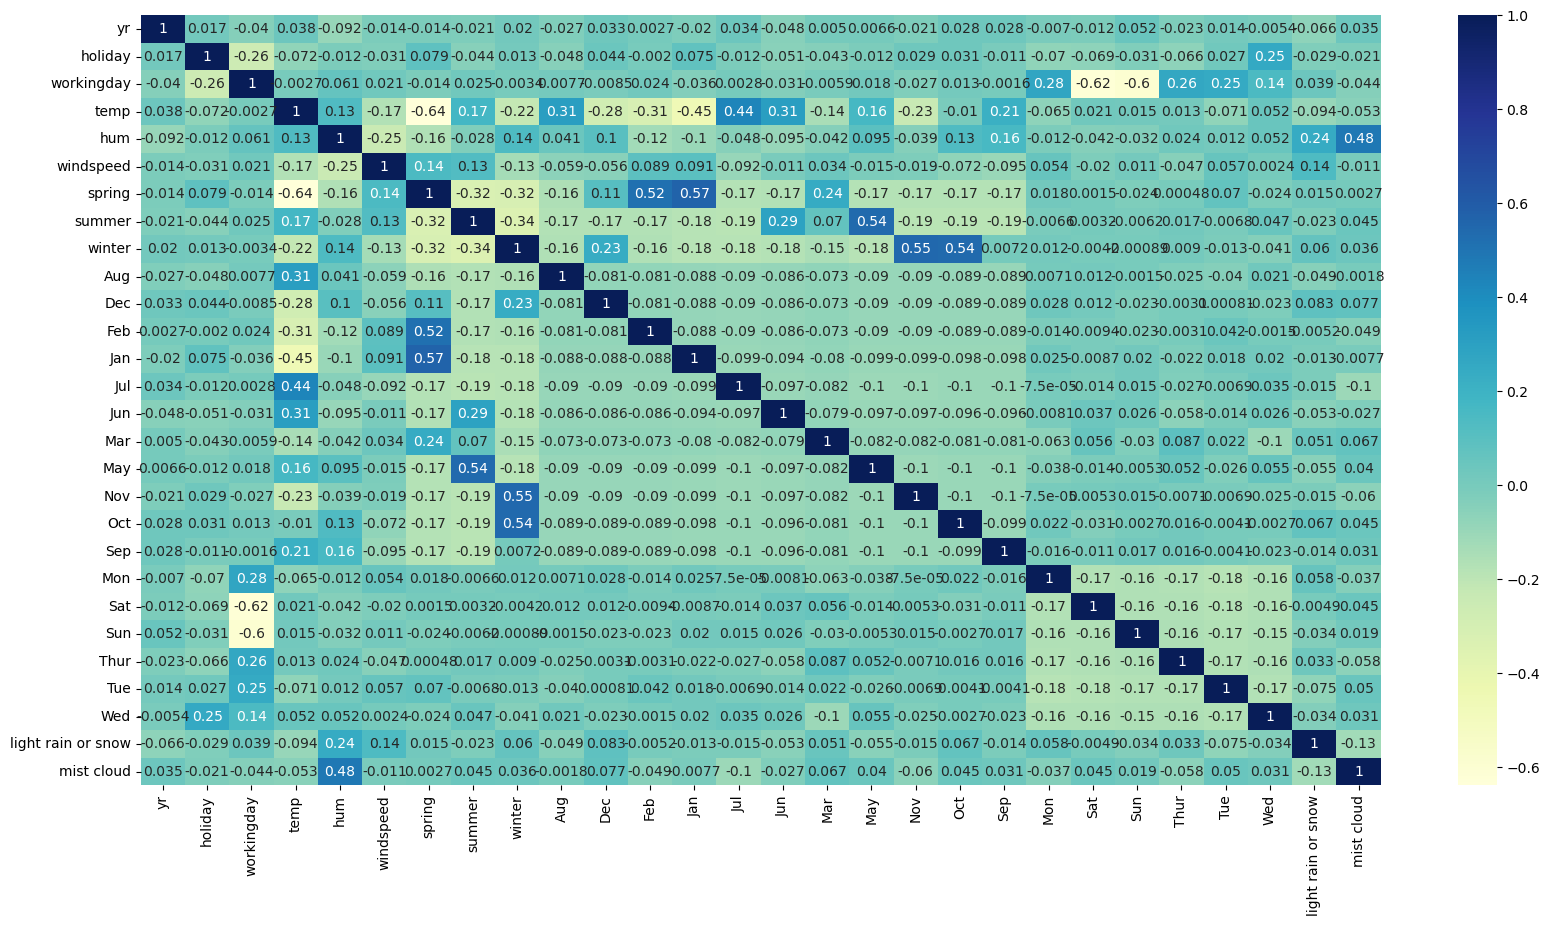

In [371]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train.corr(),annot=True,cmap='YlGnBu')

## Step 5: Building a linear model

In [372]:
import statsmodels.api as sm
X_train_lm=sm.add_constant(X_train['temp'])

In [373]:
model=sm.OLS(y_train,X_train_lm).fit()

In [374]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     341.0
Date:                Sun, 07 May 2023   Prob (F-statistic):           1.23e-58
Time:                        22:01:48   Log-Likelihood:                 148.76
No. Observations:                 510   AIC:                            -293.5
Df Residuals:                     508   BIC:                            -285.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1390      0.021      6.603      0.000       0.098       0.180
temp           0.6519      0.035     18.467      0.000       0.583       0.721
==============================================================================
Omnibus:                       12.858   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                8.206
Skew:                           0.160   Prob(JB):                       0.0165
Kurtosis:                       2.467   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Here we can see our model has r2 score 40.2 so lets build it using RFE

In [375]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [376]:
lm=LinearRegression()

rfe=RFE(estimator=lm,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [377]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 10),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 7),
 ('Jan', False, 14),
 ('Jul', True, 1),
 ('Jun', False, 11),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', False, 2),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', False, 12),
 ('Sun', False, 9),
 ('Thur', False, 13),
 ('Tue', False, 5),
 ('Wed', False, 4),
 ('light rain or snow', True, 1),
 ('mist cloud', True, 1)]

In [378]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jul', 'Mar', 'May', 'Nov', 'Sep', 'light rain or snow', 'mist cloud'],
      dtype='object')

In [379]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Aug', 'Feb', 'Jan', 'Jun', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [380]:
X_train_rfe = X_train[col]

In [381]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [382]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [383]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sun, 07 May 2023   Prob (F-statistic):          4.48e-186
Time:                        22:02:07   Log-Likelihood:                 486.53
No. Observations:                 510   AIC:                            -941.1
Df Residuals:                     494   BIC:                            -873.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3402      0

In [384]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

Features   VIF
3                 temp  3.56
6               spring  3.06
7               winter  2.36
4                  hum  1.90
12                 Nov  1.73
15          mist cloud  1.58
9                  Jul  1.43
14  light rain or snow  1.30
8                  Dec  1.29
11                 May  1.24
5            windspeed  1.21
13                 Sep  1.19
10                 Mar  1.12
1                   yr  1.03
2              holiday  1.02

In [385]:
#lets drop May 
X_train_rfe=X_train_rfe.drop('May',axis=1)

In [386]:
model2 = sm.OLS(y_train,X_train_rfe).fit() 

In [387]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 07 May 2023   Prob (F-statistic):          4.32e-186
Time:                        22:02:12   Log-Likelihood:                 483.84
No. Observations:                 510   AIC:                            -937.7
Df Residuals:                     495   BIC:                            -874.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3445      0

In [388]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

Features   VIF
3                 temp  3.55
6               spring  2.90
7               winter  2.21
4                  hum  1.87
11                 Nov  1.73
14          mist cloud  1.57
9                  Jul  1.36
13  light rain or snow  1.30
8                  Dec  1.29
5            windspeed  1.21
12                 Sep  1.14
10                 Mar  1.11
1                   yr  1.03
2              holiday  1.02

<AxesSubplot:>

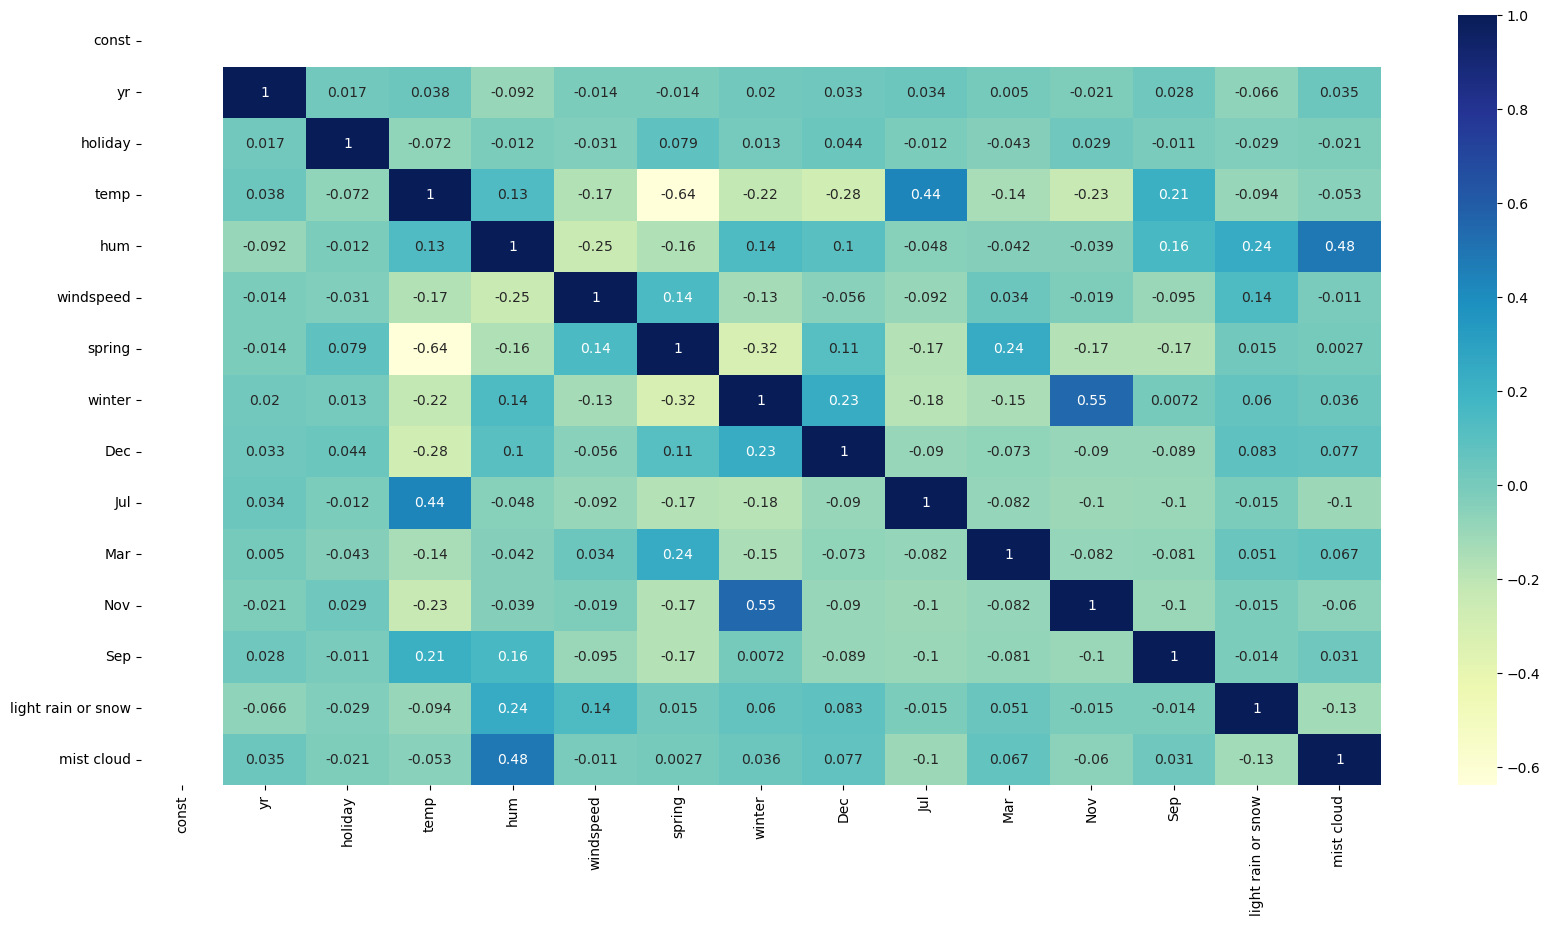

In [389]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')

In [390]:
X_train_rfe=X_train_rfe.drop('Nov',axis=1)

In [391]:
model3 = sm.OLS(y_train,X_train_rfe).fit()

In [392]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Sun, 07 May 2023   Prob (F-statistic):          2.34e-183
Time:                        22:02:24   Log-Likelihood:                 474.58
No. Observations:                 510   AIC:                            -921.2
Df Residuals:                     496   BIC:                            -861.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3160      0

In [393]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

Features   VIF
3                 temp  3.32
6               spring  2.81
4                  hum  1.87
7               winter  1.82
13          mist cloud  1.57
9                  Jul  1.35
12  light rain or snow  1.29
5            windspeed  1.21
8                  Dec  1.16
11                 Sep  1.13
10                 Mar  1.11
1                   yr  1.03
2              holiday  1.02

<AxesSubplot:>

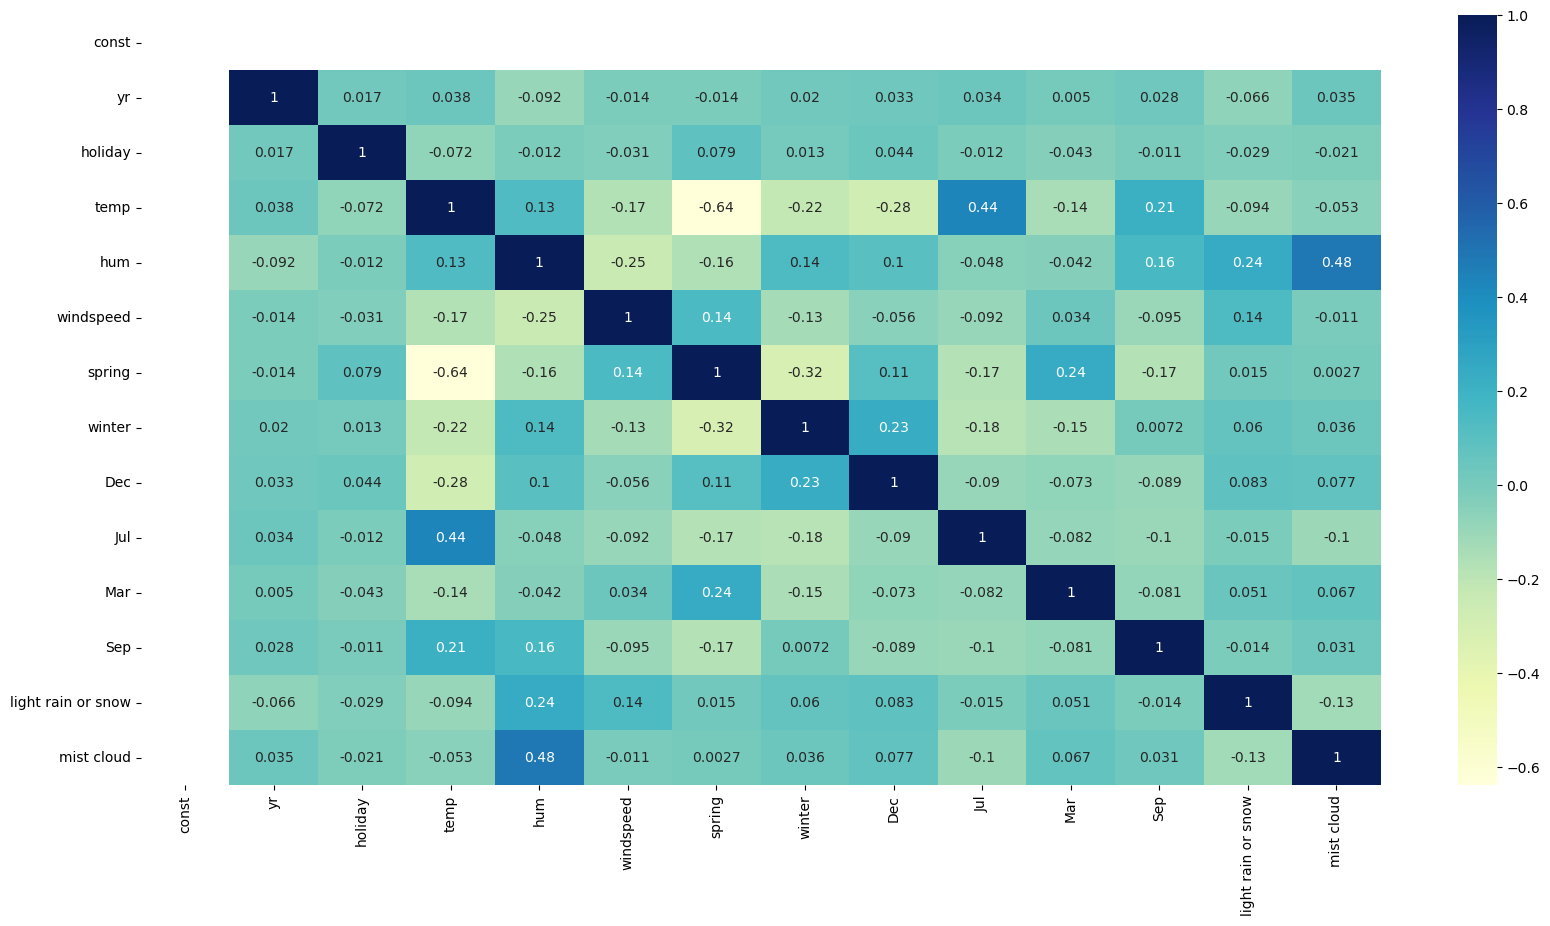

In [394]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')

In [395]:
X_train_rfe=X_train_rfe.drop('hum',axis=1)

In [396]:
model4 = sm.OLS(y_train,X_train_rfe).fit()

In [397]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     199.7
Date:                Sun, 07 May 2023   Prob (F-statistic):          2.58e-181
Time:                        22:02:41   Log-Likelihood:                 466.97
No. Observations:                 510   AIC:                            -907.9
Df Residuals:                     497   BIC:                            -852.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2237      0.028      7.980      0.000       0.169       0.279
yr                     0.2425      0.009     27.712      0.000       0.225       0.260
holiday               -0.0779      0.027     -2.907      0.004      -0.131      -0.025
temp                   0.4466      0.034     13.040      0.000       0.379       0.514
windspeed             -0.0969      0.025     -3.937      0.000      -0.145      -0.049
spring                -0.1502      0.017     -8.701      0.000      -0.184      -0.116
winter                 0.0586      0.013      4.365      0.000       0.032       0.085
Dec                   -0.0423      0.018     -2.374      0.018      -0.077      -0.007
Jul                   -0.0590      0.017     -3.389      0.001      -0.093      -0.025
Mar                    0.0561      0.019      2.984      0.003       0.019       0.093
Sep                    0.0543      0.016      3.395      0.001       0.023       0.086
light rain or snow    -0.2640      0.027     -9.937      0.000      -0.316      -0.212
mist cloud            -0.0806      0.009     -8.626      0.000      -0.099      -0.062
==============================================================================
Omnibus:                       65.816   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.302
Skew:                          -0.736   Prob(JB):                     1.87e-29
Kurtosis:                       5.015   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [398]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

Features   VIF
3                 temp  3.21
5               spring  2.81
6               winter  1.80
8                  Jul  1.34
7                  Dec  1.16
4            windspeed  1.11
10                 Sep  1.11
9                  Mar  1.10
11  light rain or snow  1.07
12          mist cloud  1.04
2              holiday  1.02
1                   yr  1.01

<AxesSubplot:>

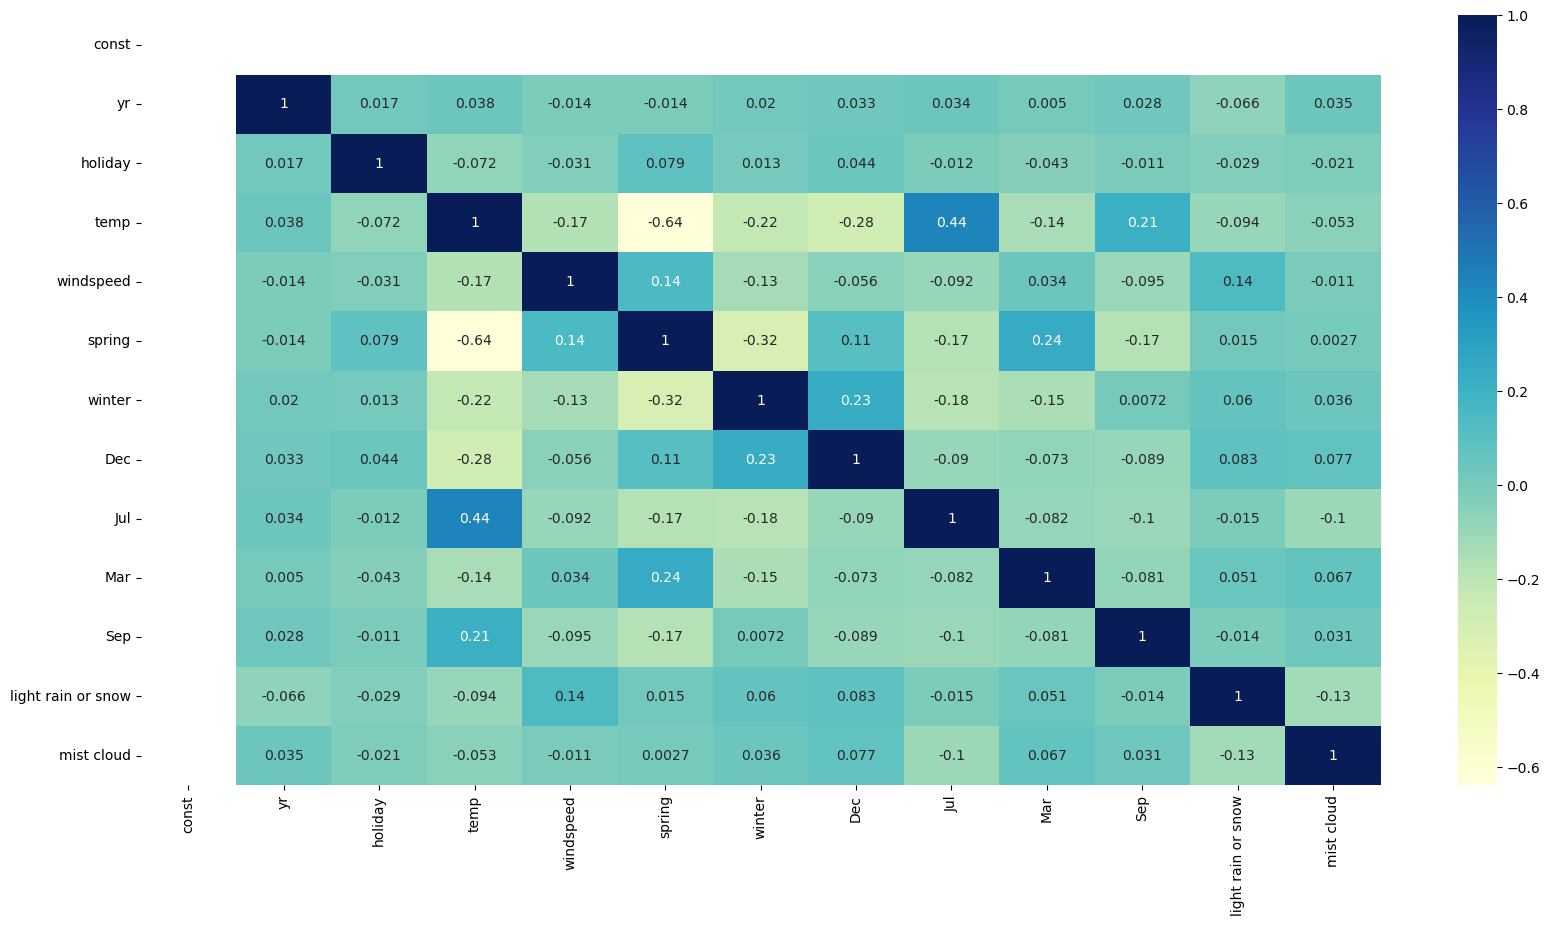

In [399]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')

In [400]:
X_train_rfe=X_train_rfe.drop('Jul',axis=1)

In [401]:
model5 = sm.OLS(y_train,X_train_rfe).fit()

In [402]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 07 May 2023   Prob (F-statistic):          4.92e-180
Time:                        22:02:50   Log-Likelihood:                 461.15
No. Observations:                 510   AIC:                            -898.3
Df Residuals:                     498   BIC:                            -847.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2399      0.028      8.596      0.000       0.185       0.295
yr                     0.2417      0.009     27.345      0.000       0.224       0.259
holiday               -0.0788      0.027     -2.912      0.004      -0.132      -0.026
temp                   0.4041      0.032     12.549      0.000       0.341       0.467
windspeed             -0.0931      0.025     -3.744      0.000      -0.142      -0.044
spring                -0.1566      0.017     -9.032      0.000      -0.191      -0.123
winter                 0.0598      0.014      4.405      0.000       0.033       0.086
Dec                   -0.0443      0.018     -2.466      0.014      -0.080      -0.009
Mar                    0.0598      0.019      3.152      0.002       0.023       0.097
Sep                    0.0661      0.016      4.183      0.000       0.035       0.097
light rain or snow    -0.2674      0.027     -9.971      0.000      -0.320      -0.215
mist cloud            -0.0784      0.009     -8.322      0.000      -0.097      -0.060
==============================================================================
Omnibus:                       72.478   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.391
Skew:                          -0.805   Prob(JB):                     4.42e-32
Kurtosis:                       5.050   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

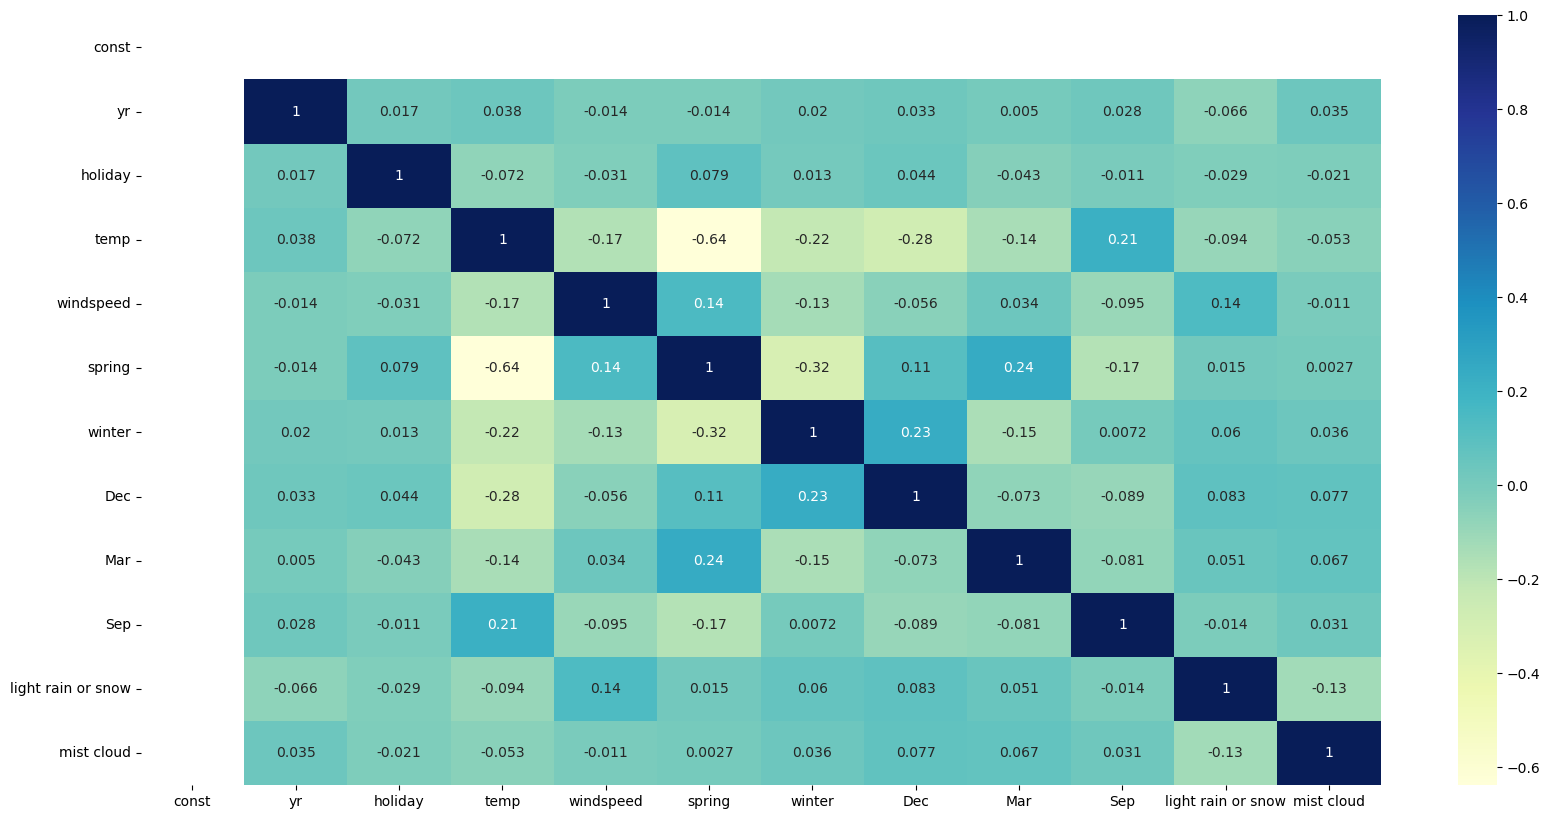

In [403]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')

In [404]:
X_train_rfe=X_train_rfe.drop('Dec',axis=1)

In [405]:
model6 = sm.OLS(y_train,X_train_rfe).fit()

In [406]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.6
Date:                Sun, 07 May 2023   Prob (F-statistic):          6.41e-180
Time:                        22:02:58   Log-Likelihood:                 458.05
No. Observations:                 510   AIC:                            -894.1
Df Residuals:                     499   BIC:                            -847.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2306      0.028      8.297      0.000       0.176       0.285
yr                     0.2407      0.009     27.125      0.000       0.223       0.258
holiday               -0.0801      0.027     -2.943      0.003      -0.134      -0.027
temp                   0.4149      0.032     12.941      0.000       0.352       0.478
windspeed             -0.0875      0.025     -3.516      0.000      -0.136      -0.039
spring                -0.1580      0.017     -9.076      0.000      -0.192      -0.124
winter                 0.0553      0.014      4.092      0.000       0.029       0.082
Mar                    0.0647      0.019      3.412      0.001       0.027       0.102
Sep                    0.0683      0.016      4.310      0.000       0.037       0.099
light rain or snow    -0.2731      0.027    -10.167      0.000      -0.326      -0.220
mist cloud            -0.0802      0.009     -8.505      0.000      -0.099      -0.062
==============================================================================
Omnibus:                       67.518   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.214
Skew:                          -0.779   Prob(JB):                     3.92e-28
Kurtosis:                       4.873   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

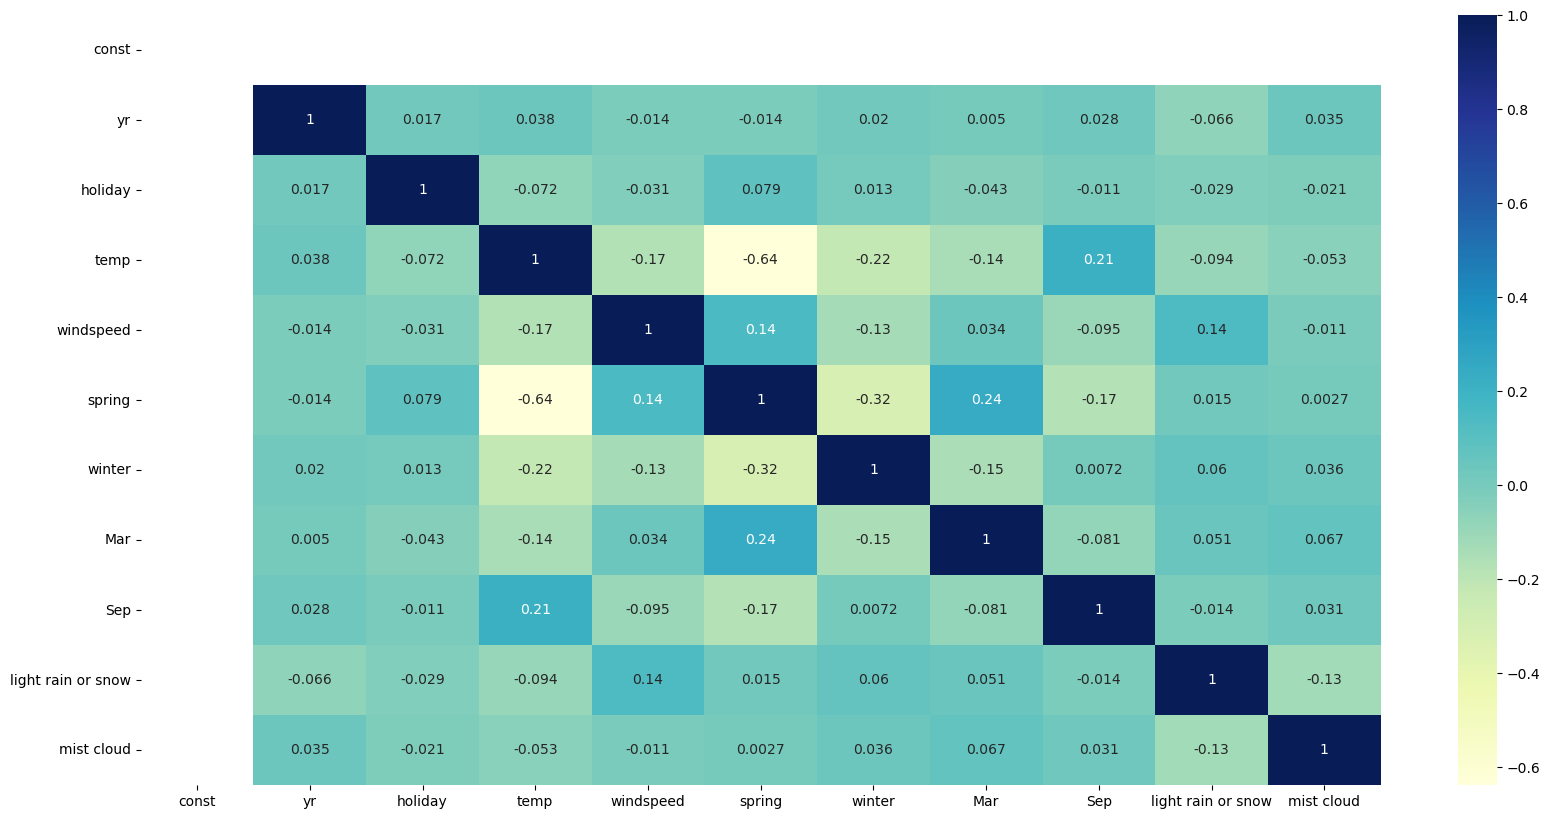

In [407]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')

In [408]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

Features   VIF
5               spring  2.77
3                 temp  2.73
6               winter  1.76
4            windspeed  1.09
7                  Mar  1.09
8                  Sep  1.06
9   light rain or snow  1.06
10          mist cloud  1.03
2              holiday  1.02
1                   yr  1.01

<AxesSubplot:>

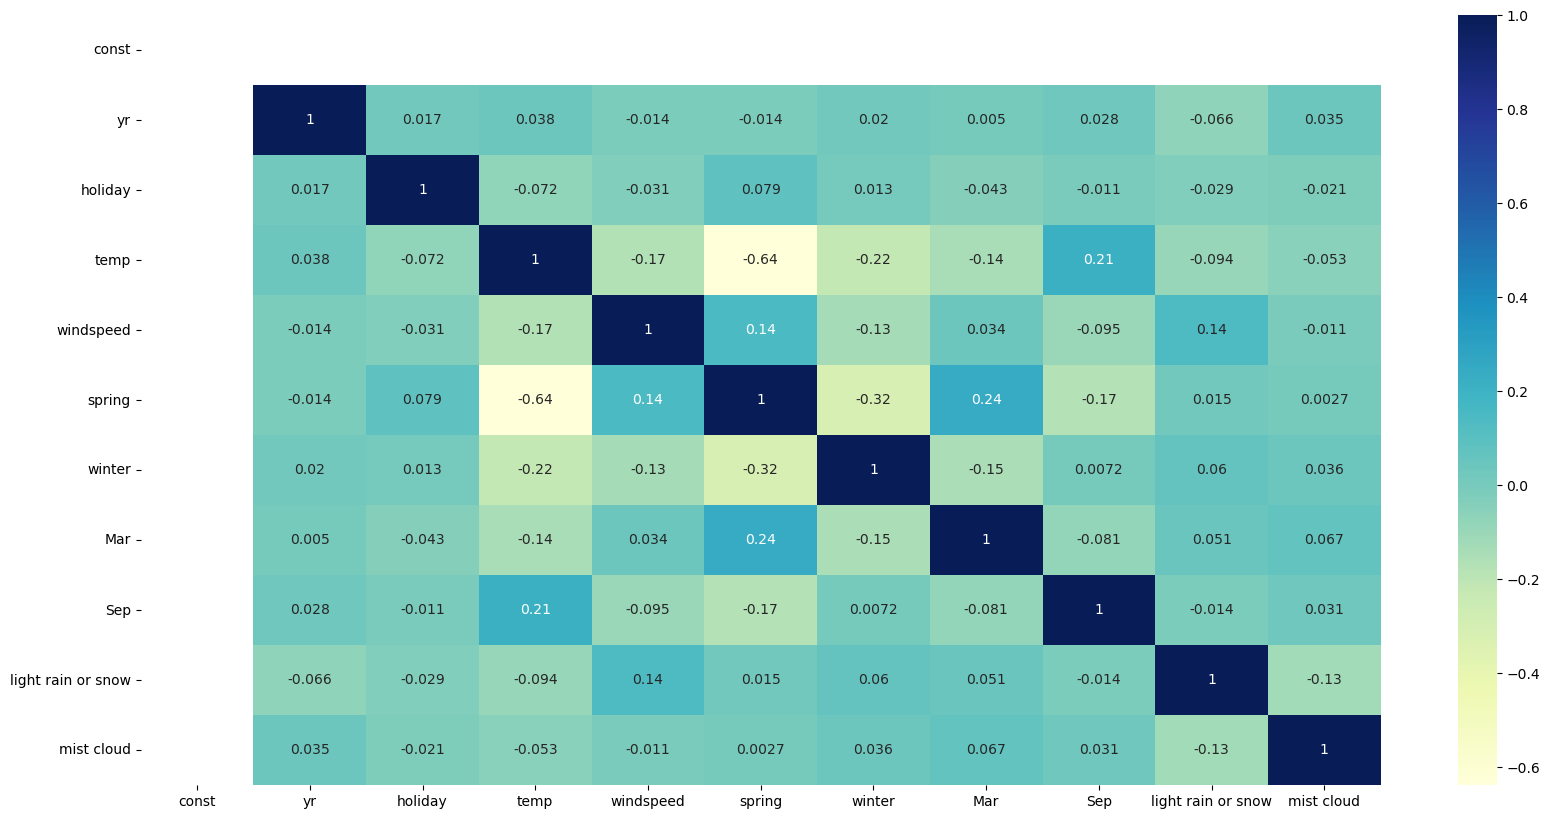

In [409]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')

We can cosider the above model i.e model6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.
F-Statistics value of 230.6 (which is greater than 1) and the p-value of 	6.41e-180 i.e almost equals to zero, states that the overall model is significant

## Step 7: Residual Analysis of the train data

In [410]:
y_train_cnt=model6.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

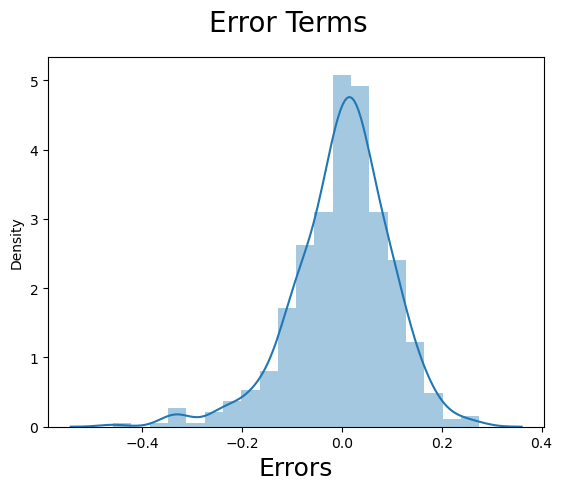

In [411]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

Error terms are distributed Normally

### Multi Collinearity

In [412]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

Features   VIF
5               spring  2.77
3                 temp  2.73
6               winter  1.76
4            windspeed  1.09
7                  Mar  1.09
8                  Sep  1.06
9   light rain or snow  1.06
10          mist cloud  1.03
2              holiday  1.02
1                   yr  1.01

As the values are less than 5 we can say no collinearity exists between parameters

<AxesSubplot:>

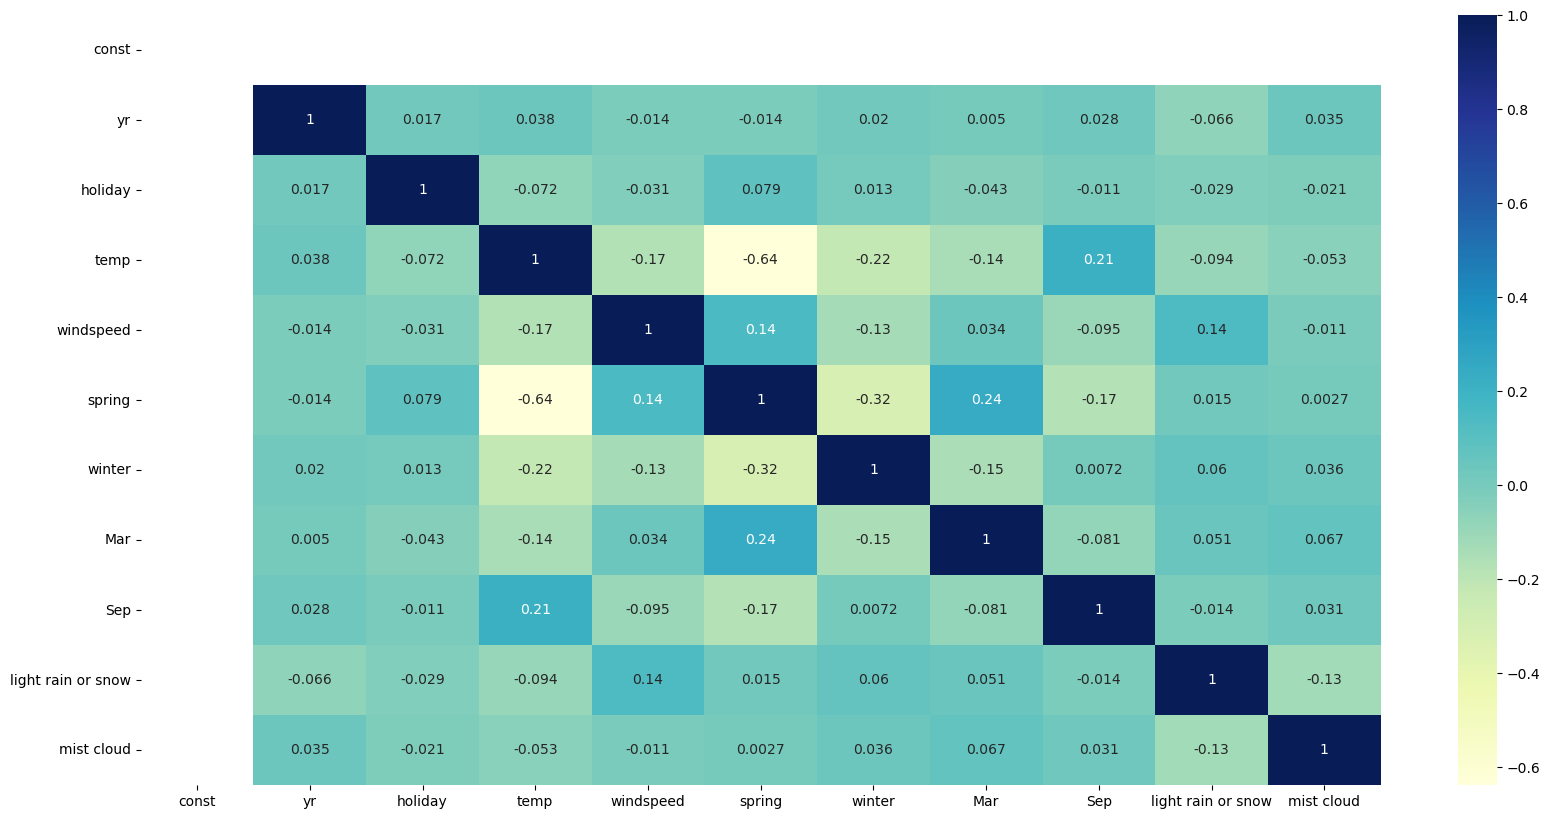

In [413]:
plt.figure(figsize=(20,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='YlGnBu')

### Homoscedasticity

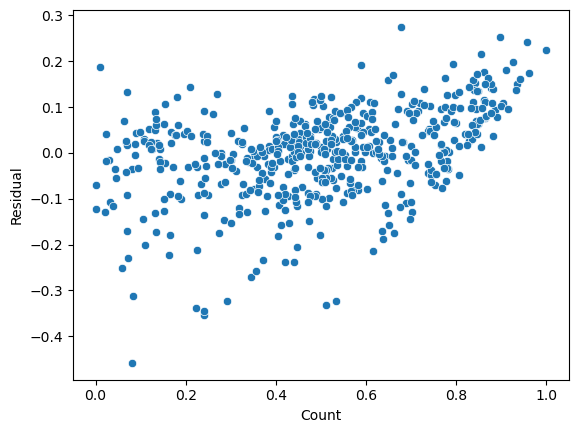

In [414]:
y_train_cnt = model6.predict(X_train_rfe)
residual = y_train - y_train_cnt
sns.scatterplot(y_train,residual)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No Visible pattern in the residuals

Durbin Watson value is 2.09 so no auto correlation

## Step 8: Making Predictions Using the Final Model

In [415]:
h=X_train_rfe.columns.to_list()

In [416]:
test=sm.add_constant(test)

In [417]:
test.head()

const  yr  holiday  workingday       temp      hum  windspeed   cnt  \
468    1.0   1        0           0  20.295000  50.2917  12.791439  7460   
148    1.0   0        0           1  27.367500  81.8750  14.333846  4788   
302    1.0   0        0           1  13.085847  62.3750  11.833339  3331   
355    1.0   0        0           0  17.356653  75.7500   3.167425  3068   
515    1.0   1        0           1  27.880000  49.2917  13.083693  7338   

     spring  summer  ...  Oct  Sep  Mon  Sat  Sun  Thur  Tue  Wed  \
468       0       1  ...    0    0    0    0    1     0    0    0   
148       0       1  ...    0    0    0    0    0     0    1    0   
302       0       0  ...    1    0    0    0    0     0    1    0   
355       1       0  ...    0    0    0    1    0     0    0    0   
515       0       1  ...    0    0    0    0    0     0    0    0   

     light rain or snow  mist cloud  
468                   0           0  
148                   0           0  
302                   0           0  
355                   0           1  
515                   0           0  

[5 rows x 30 columns]

In [418]:
values=['temp','hum','windspeed','cnt']

In [419]:
test[values]=scale.transform(test[values])

In [420]:
test.head()

const  yr  holiday  workingday      temp       hum  windspeed       cnt  \
468    1.0   1        0           0  0.543115  0.518248   0.422104  0.848606   
148    1.0   0        0           1  0.758058  0.843709   0.479765  0.526017   
302    1.0   0        0           1  0.324018  0.642765   0.386287  0.350115   
355    1.0   0        0           0  0.453814  0.780592   0.062325  0.318363   
515    1.0   1        0           1  0.773634  0.507943   0.433030  0.833877   

     spring  summer  ...  Oct  Sep  Mon  Sat  Sun  Thur  Tue  Wed  \
468       0       1  ...    0    0    0    0    1     0    0    0   
148       0       1  ...    0    0    0    0    0     0    1    0   
302       0       0  ...    1    0    0    0    0     0    1    0   
355       1       0  ...    0    0    0    1    0     0    0    0   
515       0       1  ...    0    0    0    0    0     0    0    0   

     light rain or snow  mist cloud  
468                   0           0  
148                   0           0  
302                   0           0  
355                   0           1  
515                   0           0  

[5 rows x 30 columns]

In [421]:
y_test=test['cnt']
X_test=test.drop('cnt',axis=1)

In [422]:
X_test=X_test[h]

In [423]:
X_test.head()

const  yr  holiday      temp  windspeed  spring  winter  Mar  Sep  \
468    1.0   1        0  0.543115   0.422104       0       0    0    0   
148    1.0   0        0  0.758058   0.479765       0       0    0    0   
302    1.0   0        0  0.324018   0.386287       0       1    0    0   
355    1.0   0        0  0.453814   0.062325       1       0    0    0   
515    1.0   1        0  0.773634   0.433030       0       0    0    0   

     light rain or snow  mist cloud  
468                   0           0  
148                   0           0  
302                   0           0  
355                   0           1  
515                   0           0

In [425]:
y_pred_cnt=model6.predict(X_test)

In [426]:
from sklearn.metrics import r2_score

In [427]:
r2 = r2_score(y_test, y_pred_cnt)
round(r2,4)

0.8193

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

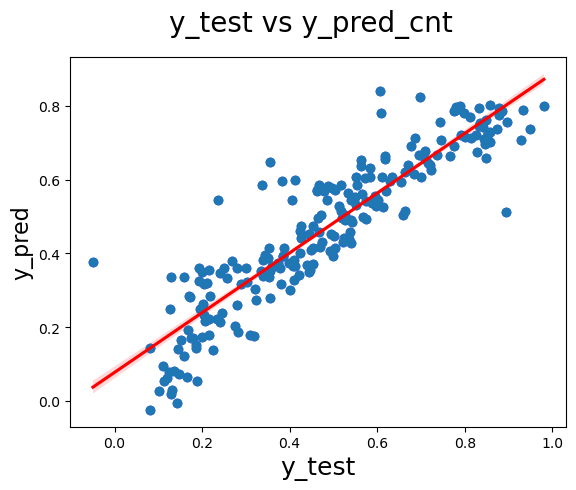

In [432]:
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred_cnt, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.scatter(y_test, y_pred_cnt)
fig.suptitle('y_test vs y_pred_cnt', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [429]:
round(model6.params,4)

const                 0.2306
yr                    0.2407
holiday              -0.0801
temp                  0.4149
windspeed            -0.0875
spring               -0.1580
winter                0.0553
Mar                   0.0647
Sep                   0.0683
light rain or snow   -0.2731
mist cloud           -0.0802
dtype: float64

Our best fitted line is

$ cnt = 0.2306 + 0.2407  \times year - 0.0801  \times  holiday + 0.4149 \times temp - 0.0875 \times windspeed + 0.1580 \times  spring + 0.0553 \times winter  + 0.0647 \times March + 0.0683 \times September - 0.2731 \times light rain or snow - 0.0802 \times mist cloud $

In [430]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8097


# Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.822
- Test dataset R^2           : 0.819
- Train dataset Adjusted R^2 : 0.8193    
- Test dataset Adjusted R^2  : 0.8097

## Year, light rain or snow ,  temp are top 3 predictor values